In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('시도별 전출입 인구수.csv', na_values="-")

# 결손값(NA)을 앞 데이터로 채운다
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135,16153,17320,17009,15062,14484
대구광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,9720.0,10464.0,10277.0,10397.0,10135,10631,10062,10191,9623,8891
인천광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,50493.0,45392.0,46082.0,51641.0,49640,47424,43212,44915,43745,40485
광주광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,10846.0,11725.0,11095.0,10587.0,10154,9129,9759,9216,8354,7932


In [7]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc["경기도"]
sr_one.head()

1970    130149.0
1971    150313.0
1972     93333.0
1973    143234.0
1974    149045.0
Name: 경기도, dtype: float64

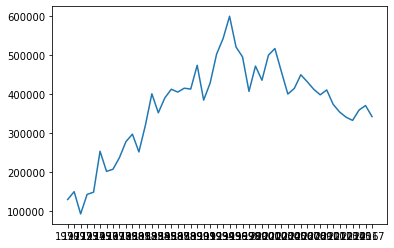

In [9]:
# x축, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

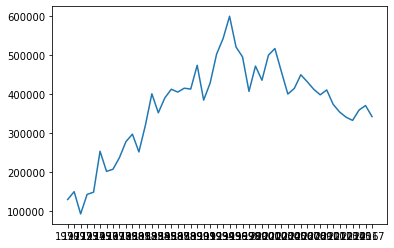

In [10]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)

In [12]:
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

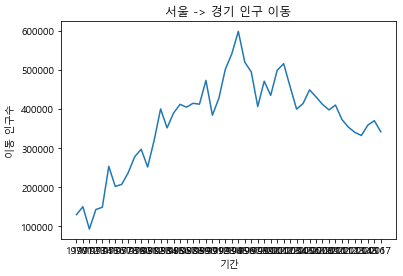

In [16]:
plt.plot(sr_one.index, sr_one.values)

# 차트 제목
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

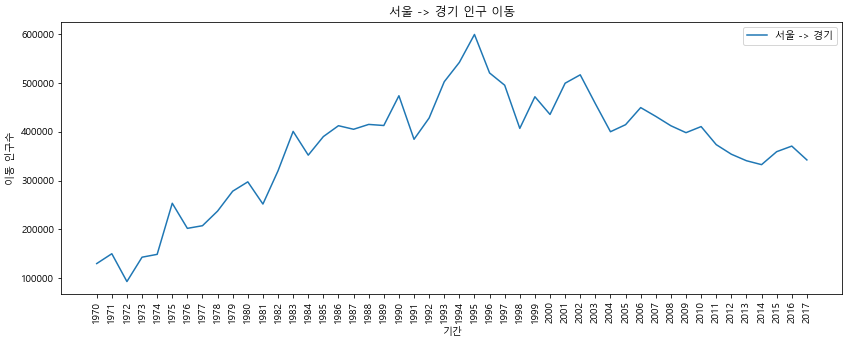

In [18]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()

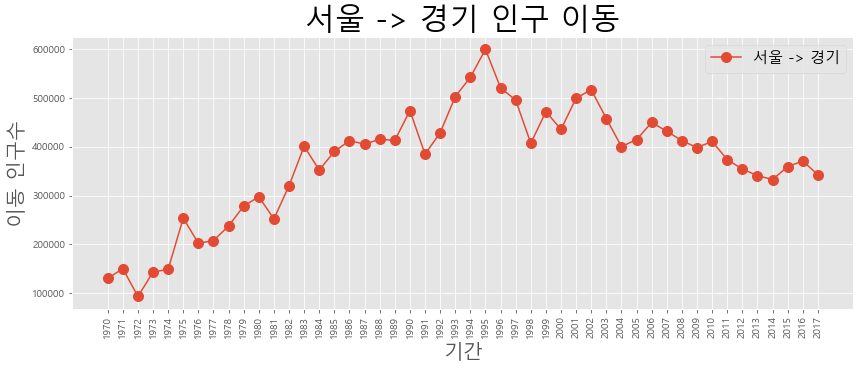

In [20]:
# 스타일 서식 지정
plt.style.use('ggplot')

plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력(마커 추가)
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
plt.show()

In [21]:
import matplotlib.pyplot as plt

# 스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


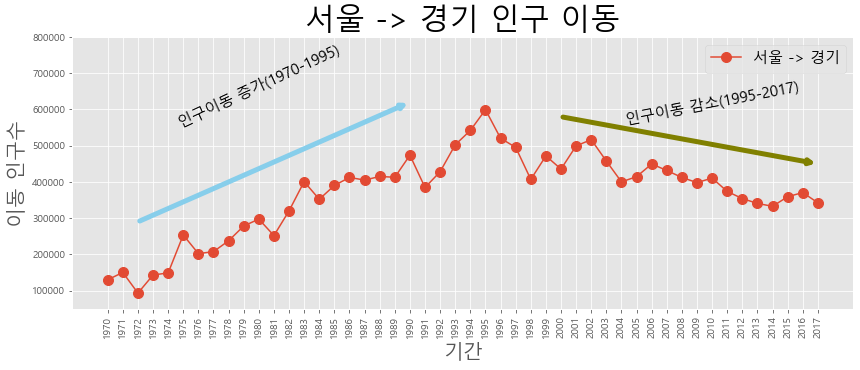

In [22]:
# 스타일 서식 지정
plt.style.use('ggplot')

plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),            # 화살표의 머리 부분(끝점)
             xytext=(2, 290000),         # 화살표의 꼬리 부분(시작점)
             xycoords='data',            # 좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5)
            )

plt.annotate('',
             xy=(47, 450000),            # 화살표의 머리 부분(끝점)
             xytext=(30, 580000),         # 화살표의 꼬리 부분(시작점)
             xycoords='data',            # 좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5)
            )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)', # 텍스트 입력
             xy=(10, 550000),            # 텍스트 위치 기준점
             rotation=25,                # 텍스트 회전각도
             va='baseline',              # 텍스트 상하 정렬
             ha='center',                # 텍스트 좌우 정렬
             fontsize=15                 # 텍스트 크기
            )

plt.annotate('인구이동 감소(1995-2017)', # 텍스트 입력
             xy=(40, 560000),            # 텍스트 위치 기준점
             rotation=11,                # 텍스트 회전각도
             va='baseline',              # 텍스트 상하 정렬
             ha='center',                # 텍스트 좌우 정렬
             fontsize=15                 # 텍스트 크기
            )

plt.show()

C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


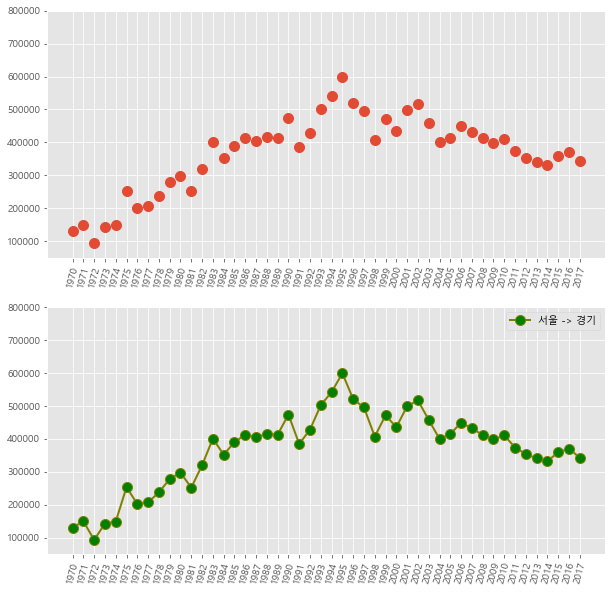

In [24]:
# 그래프 객체 생성(figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))     # plt.figure(figsize=(가로,세로)) : 그림의 틀(figure)을 만듬
ax1 = fig.add_subplot(2, 1, 1)         # {figure}.add_subplot(행크기, 열크기, 플롯순서) : 정의한 그림 틀에 실제 플롯이 들어갈 axe를 추가
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)   # {axe}.plt() : plt.plot()처럼 세부 설정해서 그림 출력
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


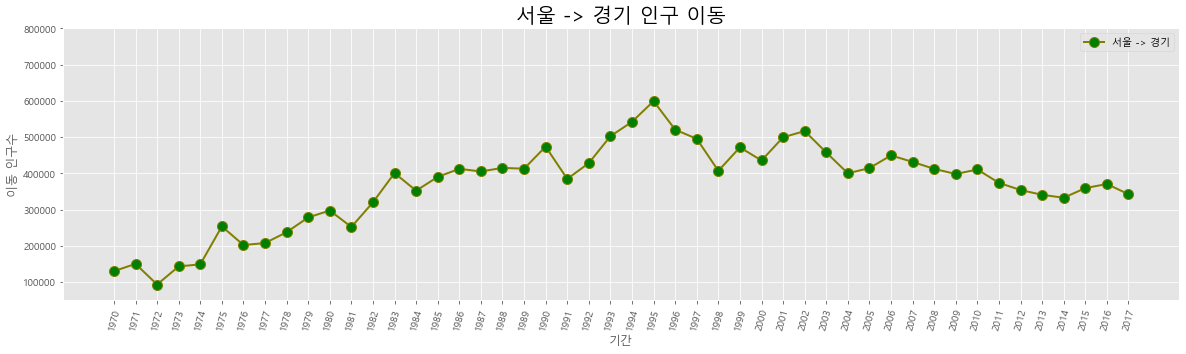

In [26]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

# 마커 모양('o','*','+','.')
ax.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

ax.set_ylim(50000, 800000)

# 차트 제목
ax.set_title('서울 -> 경기 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


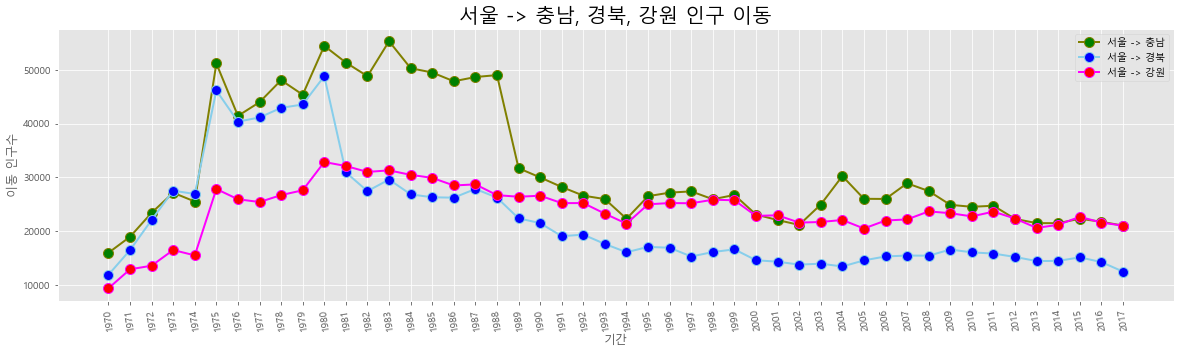

In [32]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, 
        label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, 
        label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, 
        label='서울 -> 강원')


# 범례 표시
ax.legend(loc='best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xticklabels(col_years, rotation=99)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

In [33]:
import matplotlib

colors = {}

for name, hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

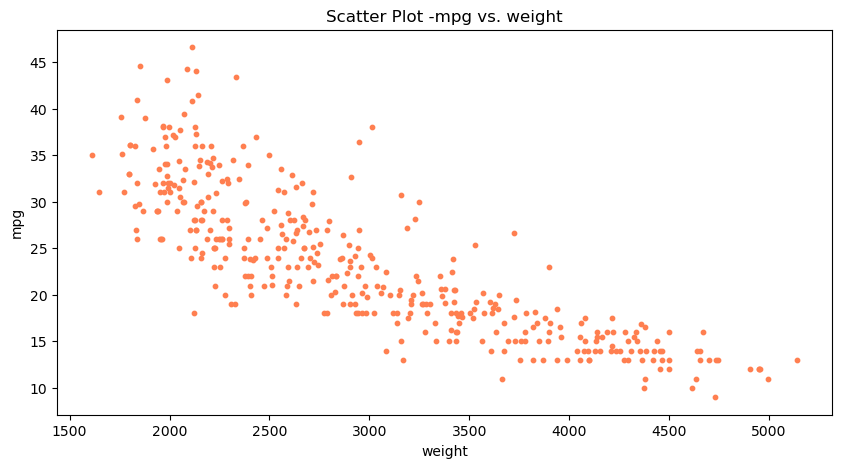

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot -mpg vs. weight')
plt.show()

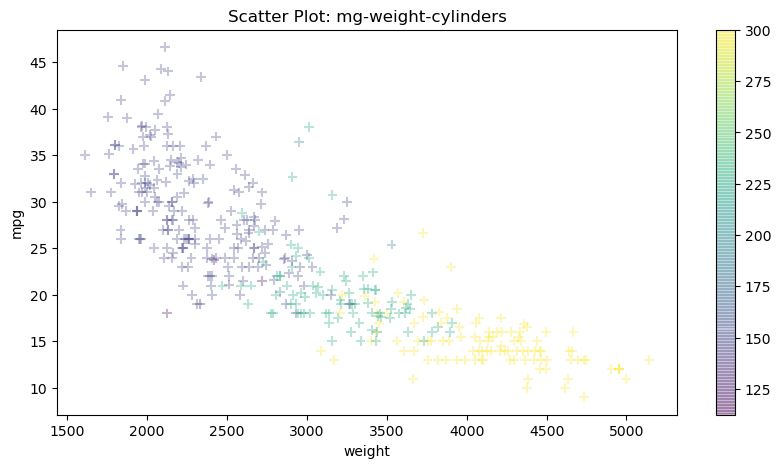

In [35]:
# 그림을 파일로 저장하기

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3 개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5), cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mg-weight-cylinders')

plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)

plt.show()

In [36]:
df[["weight", "mpg"]].corr(method="pearson")

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


In [38]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

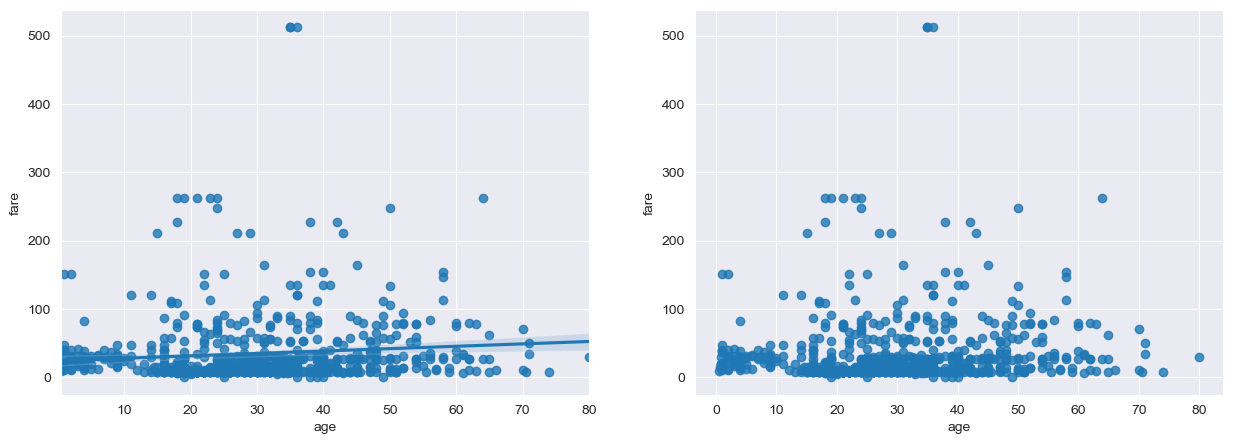

In [41]:
# {seaborn}.regplot() : 산점도를 통해 나타난 변수관계를 좀 더 명확하게 시각화
# 회귀선의 기울기 -> 피어슨 상관계수

import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',       # x축 변수
            y='fare',      # y축 변수
            data=titanic,  # 데이터
            ax=ax1)        # axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',       # x축 변수
            y='fare',      # y축 변수
            data=titanic,  # 데이터
            ax=ax2,        # axe 객체 - 2번째 그래프
            fit_reg=False)# 회귀선 미표시

plt.show()

C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\ssu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

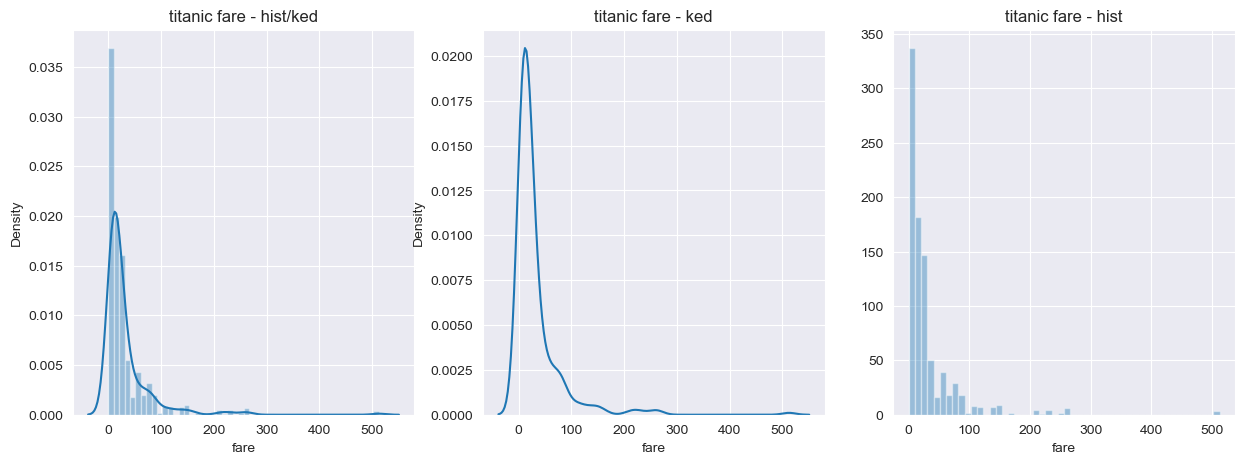

In [42]:
# {seaborn}.distplot() : 하나의 변수가 어떤 분포를 가지는지 시각화

import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.distplot(titanic['fare'], ax=ax1)

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2)

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()